# Wiki categorization
This notebook categorizes potential entities created in *potential_ents.ipynb*<br>
Categorization will be done using Wikipedia and Wikidata


In [1]:
import pandas as pd
import pickle
import os
import helper_func
from book import Book, load_book
from entity import Entity
import constants
import matplotlib.pyplot as plt
from tabulate import tabulate

### Check the result of the potential entities selection again

In [2]:
with open("./pickles/potential_ents_uniq", 'rb') as file:
    potential_ents_uniq = pickle.load(file)
    
with open("./pickles/potential_ents", 'rb') as file:
    potential_book_ents = pickle.load(file)

In [3]:
potential_ents = [ent for ents in potential_book_ents.values() for ent in ents]

data = [
    ["Number of total entities (includes duplicates)", len(potential_ents), 163100],
    ["Number of multiword total entities (includes duplicates)", len([ent for ent in potential_ents if len(ent.words) > 1]), 2631],
    ["Number of unique entities", len(potential_ents_uniq), 24665],
    ["Number of multiword unique entities", len([ent for ent in potential_ents_uniq if len(ent.words) > 1]), ],
    ["Number of unique multiword entities of length 3+", len([ent for ent in potential_ents_uniq if len(ent.words) > 2]), ],
    ["Number of total books", len(potential_book_ents), len(potential_book_ents)],
    ["Average number of entities per book", len(potential_ents) / len(potential_book_ents), 163100/len(potential_book_ents)],
    ["Number of empty books", len([book for book in potential_book_ents if len(potential_book_ents[book]) == 0]), ],
    ["Maximum number of entities per book", max([len(potential_book_ents[book]) for book in potential_book_ents]), ],
]
    
headers = ["Metric", "Count (current approach)", "Count (approach from bachelor thesis)"]
table = tabulate(data, headers, tablefmt="grid", numalign="right")
print(table)

+----------------------------------------------------------+----------------------------+-----------------------------------------+
| Metric                                                   |   Count (current approach) |   Count (approach from bachelor thesis) |
+==========================================================+============================+=========================================+
| Number of total entities (includes duplicates)           |                     157149 |                                  163100 |
+----------------------------------------------------------+----------------------------+-----------------------------------------+
| Number of multiword total entities (includes duplicates) |                       4143 |                                    2631 |
+----------------------------------------------------------+----------------------------+-----------------------------------------+
| Number of unique entities                                |                

## Entity categories
So far we have decided to only include 2 entity categories and those are: Person and Place<br>
Only these 2 so we could use the dataset well for comparison between NameTag 2.0 model and BiLSTM model

In [4]:
ents_type = []
ents_type_wiki_only = []

with open('pickles/ents_types_all.plk', 'rb') as f:
    ents_type = pickle.load(f)
    
with open('pickles/ents_types_all_wiki_only_no_other_less_all.plk', 'rb') as f:
    ents_type_wiki_only = pickle.load(f)

In [5]:
for ent in ents_type_wiki_only:
    if ent.category == constants.MYSTIC_PERSON:
        print(ent)

kyklop
bůh
božství
Amor
hospodin
duch svatý
trojice
syn boží
Dafné
Perseus
Morana
vesna
Sfinx
Rán
Ježíšek
boží syn
božstvo
Seléna
Fortuna
sfinga
Perun
Dafnis
Zefyros
Kentaur
svatý duch
pegas
Pegas
Léthé
jezulátko
bůh otec
Medusa
Kirké
Satyr
danaida
Zeus
Atropos
Isis
Charybda
Helios
Osiris
Erínye
Próteus
Sibyla
afrodita
Styx
Sibylla
Athéna
nymfa
Svantovít
Lohengrin
Deukalión
titán
Titán
Rýbrcoul
Veles
Krakonoš
amor
Athena
elysium
gigant
Valhalla
Foibos
Můza
Akrisios
Hermés
Hippolytos
Týr
Hefaistos
Morena
ježibaba
Černoboh
Niobe
German
Astarta
Danaos
Alláh
faun
Théseus
Ptah
Héra
Antigona
grácie
Minerva
Hermés Trismegistos
Varuna
Parsifal
Janus
Ariadna
Venus
Kalypsó
Leandros
Léda
Skylla
Eskulap
Eros
Adonis
morana
Aken
fortuna
Proserpina
Eurydika
Medea
Eris
Porenut
Junona
perchta
Aeskulap
Melpomené
Ormuzd
Odin
Serapis
Erós
Latona
Artemis
Hélios
Gaia
Thanatos
Héfaistos
Marsyas
Tyché
Arachné
Electra
Cupido
Icarus
Minotaurus
Diké
Pandóra
Niké
Tartaros
Poseidon
lítice
Dažbog
Morfeus
Aegina
Qui

In [6]:
for ent in ents_type:
    if ent.category == constants.PERSON:
        print(ent)

Titan
Violeta
učitel
pán
tvůrce
Kristus
radost
Loreta
otec
syn
Ondřej
Jíra
Čech
Krištof
Pavla
Pavel
Bělina
Florian
bílý
Byron
Hugo
Prométheus
noc
čas
úzkost
věčný žid
osud
naděje
žití
život
neznámá
smrt
pozdrav
stín
Strach
Smrt
ruka
Beránek
Kristus Ježíš
Pán
cherubín
pravda
soudce
Beránková
Král
vládce
jez
Krist
duch
svatý
Anděl
Vávra
Čelakovský
Bartoš
Žižka Žižka
Života
nepřítel
Tamara
Jiří
Carmen
Anička
dušička
Liliana
Lili
Rozalie
Jiřina
Mona
Fido
Španěly
Pýcha
Jan
Dominik
Petr
Alexandra
Caesar
Mojžíšová
Ind
Véna
Pepek
pepka
Václav
bernardýn
dominus
Lev
Lazar
Murat
Vojtěch
Credo
Hektor
Vilém
Umberto
Margarita
Říman
Mikuláš
Fatma
algol
Charon
Davidová
velký
Řek
Orionův
Breughel
Mráz
Matěj
Venca
Němec
Honzík
Johann
Pelikán
pelikán
Karla
Čechová
Bivoj
Hynek
Adamová
Absolón
tkadlec
vůle
sláva
Sláva
Slovák
Mojmír
Svatopluk
Maďar
běs
metoda
Slavomír
Slávie
Hanák
Valach
Horák
Moravan
Tater
slavský
Šváb
kniha
Iliada
Sara
síla
neznámo
Tobiáš
Sarah
Jakob
Ilia
Ledin
Helena
Sue
Sára
hostitel
El

In [7]:
def get_ent_types(ents_type: list, print_ents = True):    
    error_type = 0
    place = 0
    person = 0
    mystic_person = 0
    abstract = 0
    not_exist = 0
    real_person = 0
    other = 0
    disambiguation = 0
    chance_type = 0
    suspicious_type = 0

    for ent in ents_type:
        ent_type = ent.category
        match ent_type:
            case constants.DISAMBIGUATION:
                disambiguation += 1
            case constants.ERROR_TYPE:
                error_type += 1
            case constants.PLACE:
                place += 1
            case constants.PERSON:
                person += 1
            case constants.MYSTIC_PERSON:
                mystic_person += 1
            case constants.NOT_EXISTS:
                not_exist += 1
            case constants.REAL_PERSON:
                real_person += 1
            case constants.OTHER:
                other += 1
            case constants.CHANCE_TYPE:
                chance_type += 1
            case constants.SUSPICIOUS_TYPE:
                suspicious_type += 1
    
    if print_ents:        
        print("Disambiguation: ", disambiguation)
        print("Error type: ", error_type)
        print("Place: ", place)
        print("Person: ", person)
        print("Mystic person: ", mystic_person)
        print("Not exist: ", not_exist)
        print("Real person: ", real_person)
        print("Other: ", other)
        print("Chance type: ", chance_type)
        print("Suspicious type: ", suspicious_type)
        print("Total: ", len(ents_type))
    
    return disambiguation, error_type, place, person, mystic_person, not_exist, real_person, other, chance_type

In [8]:
disambiguation, error_type, place, person, mystic_person, not_exist, real_person, other, chance_type = get_ent_types(ents_type)

Disambiguation:  2
Error type:  0
Place:  3718
Person:  5756
Mystic person:  355
Not exist:  3724
Real person:  561
Other:  399
Chance type:  0
Suspicious type:  0
Total:  14515


In [9]:
disambiguation_wiki_only, error_type_wiki_only, place_wiki_only, person_wiki_only, mystic_person_wiki_only, not_exist_wiki_only, real_person_wiki_only, other_wiki_only, chance_type_wiki_only = get_ent_types(ents_type_wiki_only)

Disambiguation:  3563
Error type:  0
Place:  916
Person:  1288
Mystic person:  178
Not exist:  8570
Real person:  0
Other:  0
Chance type:  0
Suspicious type:  0
Total:  14515


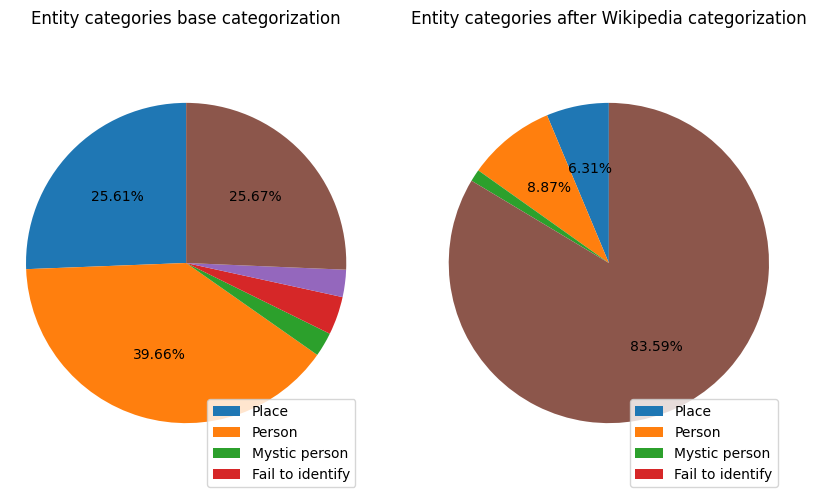

In [14]:
import matplotlib.pyplot as plt

def my_autopct(pct):
        return ('%.2f%%' % pct) if pct > 5 else ''

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Place', 'Person', 'Mystic person', 'Fail to identify'
sizes = [place, person, mystic_person, real_person, other, (len(ents_type) - place - person - mystic_person - real_person - other)]
sizes_wiki_only = [place_wiki_only, person_wiki_only, mystic_person_wiki_only, real_person_wiki_only, other_wiki_only, (len(ents_type_wiki_only) - place_wiki_only - person_wiki_only - mystic_person_wiki_only - real_person_wiki_only - other_wiki_only)]

fig1, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 6))
ax1.pie(sizes, autopct=my_autopct, startangle=90)
ax1.legend(labels, loc="lower right")
ax1.set_title("Entity categories base categorization")
ax1.axis('equal')

ax2.pie(sizes_wiki_only, autopct=my_autopct, startangle=90)
ax2.legend(labels, loc="lower right")
ax2.set_title("Entity categories after Wikipedia categorization")
ax2.axis('equal')

plt.show()

### Remove suspicious words and select stanzas
Words that might be an entity but were not selected in potential ents<br>
If words are not marked as potential entity however they have a capital first word and are a noun, adjective and are not in starting words or if words is unknown morphologically even if it is a starting word.<br>



**Select stanzas from entities that use both Wiki and Wikidata**

**Select stanzas with entities categorized through Wikipedia only**

### Check out entities in these selected stanzas

In [ ]:
#with open("./pickles/valid_ents.plk", 'wb') as file:
#    pickle.dump(valid_ents, file)
#    
#with open("./pickles/valid_ents_wiki_only_no_other_less_all.plk", 'wb') as file:
#    pickle.dump(valid_ents_wiki_only, file)

In [ ]:
with open('pickles/valid_ents.plk', 'rb') as f:
    valid_ents = pickle.load(f)

with open('pickles/valid_ents_wiki_only_no_other_less_all.plk', 'rb') as f:
    valid_ents_wiki_only = pickle.load(f)

In [ ]:
valid_ents_wiki_only_tuples = get_ent_types(valid_ents_wiki_only)

Disambiguation:  0
Error type:  0
Place:  6460
Person:  27957
Mystic person:  19884
Not exist:  0
Real person:  7565
Other:  0
Chance type:  0
Suspicious type:  0
Total:  61866


In [ ]:
valid_ents_wiki_only_tuples = get_ent_types(valid_ents_wiki_only, False)
valid_ents_tuples = get_ent_types(valid_ents, False)
valid_ents_wiki_only_uniq = helper_func.make_unique_multiword(valid_ents_wiki_only)
valid_ents_wiki_only_uniq_tuples = get_ent_types(valid_ents_wiki_only_uniq, False)
valid_ents_uniq = helper_func.make_unique_multiword(valid_ents)
valid_ents_uniq_tuples = get_ent_types(valid_ents_uniq, False)


data = [
    ["Number of total entities (includes duplicates)", len(valid_ents), len(valid_ents_wiki_only)],
    ["Number of multiword total entities (includes duplicates)", len([ent for ent in valid_ents if len(ent.words) > 1]), len([ent for ent in valid_ents_wiki_only if len(ent.words) > 1])],
    ["Number of unique entities", len(valid_ents_uniq), len(valid_ents_wiki_only_uniq)],
    ["Number of multiword unique entities", len([ent for ent in valid_ents_uniq if len(ent.words) > 1]), len([ent for ent in valid_ents_wiki_only_uniq if len(ent.words) > 1])],
    ["Number of unique multiword entities of length 3+", len([ent for ent in valid_ents_uniq if len(ent.words) > 2]), len([ent for ent in valid_ents_wiki_only_uniq if len(ent.words) > 2])],
    ["Number of stanzas containing 1+ entities", 87183, 26914],
    ["Average number of entities per stanza with 1+ entities", len(valid_ents) / 87183, len(valid_ents_wiki_only) / 26914],
    ["Average number of entities per stanza with 0+ entities", len(valid_ents) / 361949, len(valid_ents_wiki_only) / 301680],    
    ["Number of Person entities", valid_ents_tuples[3], valid_ents_wiki_only_tuples[3]],
    ["Number of Person entities unique", valid_ents_uniq_tuples[3], valid_ents_wiki_only_uniq_tuples[3]],
    ["Number of Real Person entities", valid_ents_tuples[6], valid_ents_wiki_only_tuples[6]],
    ["Number of Real Person entities unique", valid_ents_uniq_tuples[6], valid_ents_wiki_only_uniq_tuples[6]],
    ["Number of Mystic Person entities", valid_ents_tuples[4], valid_ents_wiki_only_tuples[4]],
    ["Number of Mystic Person entities unique", valid_ents_uniq_tuples[4], valid_ents_wiki_only_uniq_tuples[4]], 
    ["Number of Place entities", valid_ents_tuples[2], valid_ents_wiki_only_tuples[2]],
    ["Number of Place entities unique", valid_ents_uniq_tuples[2], valid_ents_wiki_only_uniq_tuples[2]],
    ["Number of Other entities", valid_ents_tuples[7], valid_ents_wiki_only_tuples[7]],
    ["Number of Other entities unique", valid_ents_uniq_tuples[7], valid_ents_wiki_only_uniq_tuples[7]],

]
    
headers = ["Metric", "Count using Wiki + Wikidata", "Count using Wiki only"]
table = tabulate(data, headers, tablefmt="grid", numalign="right")
print(table)

+----------------------------------------------------------+-------------------------------+-------------------------+
| Metric                                                   |   Count using Wiki + Wikidata |   Count using Wiki only |
+==========================================================+===============================+=========================+
| Number of total entities (includes duplicates)           |                        170610 |                   61866 |
+----------------------------------------------------------+-------------------------------+-------------------------+
| Number of multiword total entities (includes duplicates) |                          1549 |                     546 |
+----------------------------------------------------------+-------------------------------+-------------------------+
| Number of unique entities                                |                         11116 |                    2450 |
+-----------------------------------------------

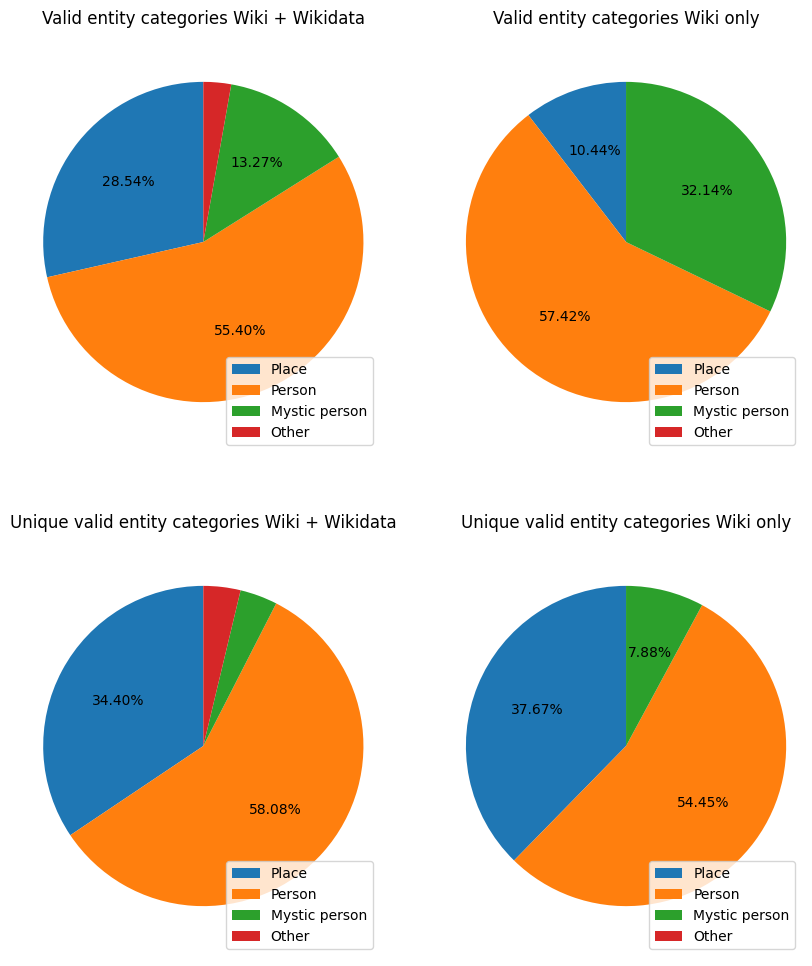

In [ ]:
def my_autopct(pct):
        return ('%.2f%%' % pct) if pct > 5 else ''

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Place', 'Person', 'Mystic person', 'Other'
sizes = [valid_ents_tuples[2], valid_ents_tuples[3]+valid_ents_tuples[6], valid_ents_tuples[4], valid_ents_tuples[7]]
sizes_wiki_only = [valid_ents_wiki_only_tuples[2], valid_ents_wiki_only_tuples[3]+valid_ents_wiki_only_tuples[6], valid_ents_wiki_only_tuples[4], valid_ents_wiki_only_tuples[7]]

sizes_uniq = [valid_ents_uniq_tuples[2], valid_ents_uniq_tuples[3]+valid_ents_uniq_tuples[6], valid_ents_uniq_tuples[4], valid_ents_uniq_tuples[7]]
sizes_wiki_only_uniq = [valid_ents_wiki_only_uniq_tuples[2], valid_ents_wiki_only_uniq_tuples[3]+valid_ents_wiki_only_uniq_tuples[6], valid_ents_wiki_only_uniq_tuples[4], valid_ents_wiki_only_uniq_tuples[7]]

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))
ax1.pie(sizes, autopct=my_autopct, startangle=90)
ax1.legend(labels, loc="lower right")
ax1.set_title("Valid entity categories Wiki + Wikidata")
ax1.axis('equal')

ax2.pie(sizes_wiki_only, autopct=my_autopct, startangle=90)
ax2.legend(labels, loc="lower right")
ax2.set_title("Valid entity categories Wiki only")
ax2.axis('equal')

ax3.pie(sizes_uniq, autopct=my_autopct, startangle=90)
ax3.legend(labels, loc="lower right")
ax3.set_title("Unique valid entity categories Wiki + Wikidata")
ax3.axis('equal')

ax4.pie(sizes_wiki_only_uniq, autopct=my_autopct, startangle=90)
ax4.legend(labels, loc="lower right")
ax4.set_title("Unique valid entity categories Wiki only")
ax4.axis('equal')

plt.show()

In [ ]:
for ent in valid_ents_wiki_only_uniq:
    if not ent.category == constants.OTHER:
        continue
    for word in ent.words:
        print(f"{word.token} / {word.lemma}", end=" ")
    print()

In [ ]:
def valid_ents_sentences(directory: str) -> str:
    res = ""
    i = 0
    
    used_ents = set()
    
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
    
        if not os.path.isfile(filepath) or not filepath.endswith(".json"):
            continue
        
        res += f"{filepath}:\n"
        curr_book = load_book(filepath)
        
        for stanza in curr_book.get_stanzas():
            if not stanza.get_ents():
                continue
            
            all_valid = True
            stanza_ents = stanza.get_ents()
            
            for ent in stanza_ents:
                if not ent.is_valid_type():
                    all_valid = False
                    break
                
            if not all_valid:
                continue
            
            for line in stanza.lines:
                for ent in stanza_ents:
                    if not line.contains_ent_lemma(ent):
                        continue
                    
                    if ent in used_ents:
                        continue
                    
                    used_ents.add(ent)

                    res += f'{ent.to_str_token()},{ent.to_str_lemma()},{ent.category}, | {line.text}\n'
            
        res += "\n"
            
        #i += 1
        #if i > 500:
        #    break
                        
    return res
                
            

In [ ]:
valid_sentences = valid_ents_sentences("../book_ents_categorized_wiki_only_no_other_less_all")

In [ ]:
for line in valid_sentences.split("\n"):
    line_arr = line.split(",")
    if len(line_arr) <= 1:
        #print(line)
        continue
    
    if "REAL" in line_arr[2]:
        print(line)
    
    #if line_arr[2] == "PERSON":
    #    if line_arr[1].islower():
    #        print(line)

In [ ]:
# Specify the directory path you want to work with
training_stanzas_dir_ents = "../training_stanzas_wiki_only/ents"
training_stanzas_txt_dir_ents = "../training_stanzas_wiki_only_txt/ents"

def remove_not_exit_mw(dir_lines: str, dir_txt: str):
    '''
    If we have mw entity that should be not exits sometimes we accidentally labeled the first word
    Which in process labelled the whole entity as valid (which is not)
    So we have to remove stanzas that have not exist in them
    '''
    for filename in os.listdir(dir_lines):
        # Check if the item is a file (not a directory)
        file_path_lines = os.path.join(dir_lines, filename)
        file_path_txt = os.path.join(dir_txt, filename)
        
        if os.path.isfile(file_path_lines) and os.path.isfile(file_path_txt):
            
            contains_not_exists = False
            
            with open(f"{file_path_lines}", "r", encoding="utf-8") as file_lines:
                for line in file_lines:
                    category = line.split("\t")[-1]
                    if "NOT EXISTS" in category:
                        contains_not_exists = True
                        break
            
            if contains_not_exists:        
                try:
                    os.remove(file_path_lines)
                    print(f"Removed: {file_path_lines}")
                except OSError as e:
                    print(f"Error deleting {file_path_lines}: {e}")
                    
                try:
                    os.remove(file_path_txt)
                    print(f"Removed: {file_path_txt}")
                except OSError as e:
                    print(f"Error deleting {file_path_txt}: {e}")


remove_not_exit_mw(training_stanzas_dir_ents, training_stanzas_txt_dir_ents)

## Valid and invalid sentences
Since some stanzas are super long in the poems, we want to find a better context size for our model (since we are suing BiLSTM). In typical NER sentences are used, so lets try that one poems (even though some poems have a wierd usage of ending punctuation).



In [ ]:
import random
book_dir_path = "../book_ents_categorized"
file_list = [os.path.join(book_dir_path, f) for f in os.listdir(book_dir_path) if os.path.isfile(os.path.join(book_dir_path, f))]
# do not add .gitignore file
file_list = [file for file in file_list if not file.endswith(".gitignore")]
random_file_path = random.choice(file_list)

curr_book = load_book(random_file_path)
curr_book = load_book("../book_ents_categorized/0791.json")
print(random_file_path)

../book_ents_categorized\1035.json


In [ ]:
long_stanzas = 0
all_stanzas = 0
chunk = 5

for stanza in curr_book.get_stanzas():
    if len(stanza.lines) > chunk:
        long_stanzas += 1
        #print(stanza)
    all_stanzas += 1
    
print(f"Number of stanzas bigger than {chunk} is {long_stanzas} out fo {all_stanzas}")

Number of stanzas bigger than 5 is 134 out fo 134


In [ ]:
# runtime: 5min

import statistics
sentences = []
stanzas = []
sentences_lens = []
stanza_lens = []
directory = "../book_ents_categorized"

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)

    if not os.path.isfile(filepath) or not filepath.endswith(".json"):
        continue
    
    curr_book = load_book(filepath)

    sentences.extend(curr_book.get_sentences_new())
    stanzas.extend(curr_book.get_stanzas())
    
sentences_lens = [len(sentence) for sentence in sentences]
stanza_lens = [len(stanza.get_words()) for stanza in stanzas]

median_length_sentence = statistics.median(sentences_lens)
median_length_stanza = statistics.median(stanza_lens)

max_length_sentence = max(sentences_lens)
max_length_stanzas = max(stanza_lens)

length_20_bigger = sum(1 for sentence in sentences if len(sentence) > 20)

data = [
    ["Total number of chunks(sentence/stanza)", len(sentences), len(stanzas)],
    ["Average number of words (length) per chunk", sum(sentences_lens)/len(sentences), sum(stanza_lens)/len(stanzas)],
    ["Median for chunk length (in words)", median_length_sentence, median_length_stanza],
    ["Maximum length of chunk (in words)", max_length_sentence, max_length_stanzas],
    ["Number of chunks with len over 50 words", sum(1 for sentence in sentences_lens if sentence > 50), sum(1 for stanza in stanza_lens if stanza > 50)]
]
    
headers = ["Metric", "Sentences", "Stanzas"]
table = tabulate(data, headers, tablefmt="grid", numalign="right")
print(table)

+--------------------------------------------+-------------+-----------+
| Metric                                     |   Sentences |   Stanzas |
+============================================+=============+===========+
| Total number of chunks(sentence/stanza)    |      719935 |    374537 |
+--------------------------------------------+-------------+-----------+
| Average number of words (length) per chunk |     17.5528 |     33.74 |
+--------------------------------------------+-------------+-----------+
| Median for chunk length (in words)         |          17 |        23 |
+--------------------------------------------+-------------+-----------+
| Maximum length of chunk (in words)         |          74 |      7206 |
+--------------------------------------------+-------------+-----------+
| Number of chunks with len over 50 words    |       13405 |     46107 |
+--------------------------------------------+-------------+-----------+


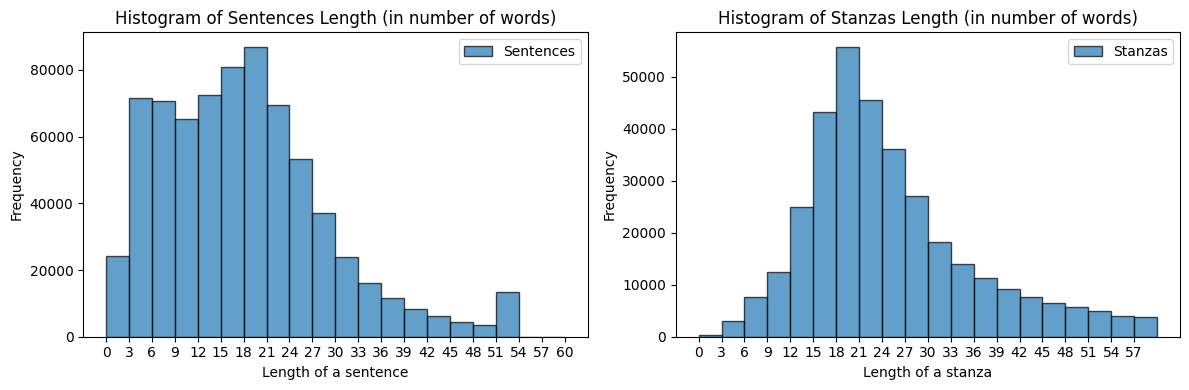

In [ ]:
import matplotlib.pyplot as plt

## Create a histogram
#plt.hist(sentences_lens, bins=50, edgecolor='black', alpha=0.7)
#plt.xlabel('Length of a sentence')
#plt.ylabel('Frequency')
#plt.title('Histogram of sentences length (in number of words)')
#plt.show()

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first histogram (sentences)
max_bin_value_sentences = 60
bin_size = 3
ax1.hist(sentences_lens, bins=range(0, max_bin_value_sentences + bin_size, bin_size), edgecolor='black', alpha=0.7, label='Sentences')
ax1.set_xlabel('Length of a sentence')
ax1.set_xticks(range(0, max_bin_value_sentences + bin_size, bin_size))
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Sentences Length (in number of words)')

# Plot the second histogram (stanzas)
ax2.hist(stanza_lens, bins=range(0, max_bin_value_sentences + bin_size, bin_size), edgecolor='black', alpha=0.7, label='Stanzas')
ax2.set_xlabel('Length of a stanza')
ax2.set_xticks(range(0, max_bin_value_sentences, bin_size))
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Stanzas Length (in number of words)')

# Add legends
ax1.legend()
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
for sentence in sentences:
    if len(sentence) < 40:
        continue
    
    print([word[0] for word in sentence])
    break

['Kraj', 'světa', 'obešel', 'jsem', 'všecky', 'typy', 'plemene', 'lidského', 'jsem', 'poznal', 'pletě', 'všech', 'pásem', 'nejlibější', 'v', 'celém', 'světě', 'od', 'břehů', 'širých', 'otce', 'Missisipi', 'až', 'k', 'Indu', 'rumem', 'bohatému', 'v', 'letě', 'jsem', 'v', 'Bankoku', 'zřel', 'lidské', 'poupě', 'na', 'dvoře', 'krále', 'Siamského', 'skvělém']
